Import the dataset: 
https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data

In [144]:
import pandas as pd

df = pd.read_csv(f'Salary_Data.csv')

display(df)
display(df.dtypes)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Parse and Clean data

In [145]:

cleaned_df = df[ df['Age'].isna() | df['Gender'].isna() | df['Education Level'].isna() | df['Job Title'].isna() | df['Years of Experience'].isna() | df['Salary'].isna() ]

display(cleaned_df)

cleaned_df = df.dropna()
display(cleaned_df)

def clean_education_level( education_level:str ) -> str :
    if education_level == "Bachelor's":
        return "Bachelor's Degree"
    elif education_level == "Master's":
        return "Master's Degree"
    elif education_level == "phD":
        return "PhD"
    else:
        return education_level

cleaned_df['Education Level'] = cleaned_df['Education Level'].apply(clean_education_level)
display(cleaned_df)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


/var/folders/67/nx480sn114s0fyjns1b1yfzh0000gn/T/ipykernel_65626/1339044127.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Education Level'] = cleaned_df['Education Level'].apply(clean_education_level)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


**Is there statistical difference between the mean salaries of the different education levels? The different education levels being: High School, Bachelor's Degree, Master's Degree, and PhD** $\\$
H0: Education level does not have an effect on salary $\\$
Ha: Education level does have an effect on salary

np.float64(36706.69419642857)

np.float64(95082.90863952333)

np.float64(130112.05645161291)

np.float64(165651.4579985391)

F_onewayResult(statistic=np.float64(1630.9393525726196), pvalue=np.float64(0.0))

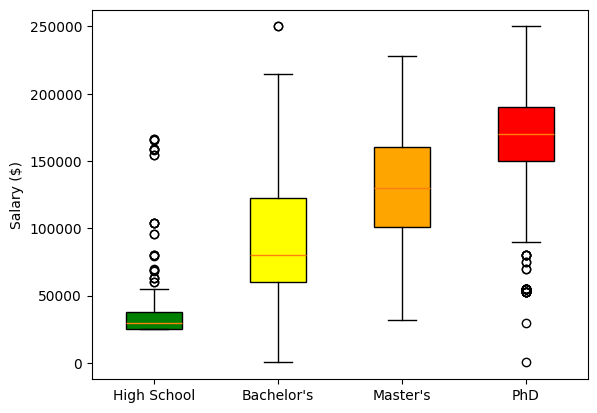

In [146]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

education_level_groups = cleaned_df.groupby('Education Level')

high_school = education_level_groups.Salary.get_group(name="High School")
bachelors = education_level_groups.Salary.get_group(name="Bachelor's Degree")
masters = education_level_groups.Salary.get_group(name="Master's Degree")
phd = education_level_groups.Salary.get_group(name="PhD")

display(high_school.mean())
display(bachelors.mean())
display(masters.mean())
display(phd.mean())

education_level_salary_ANOVA = sp.stats.f_oneway(high_school, bachelors, masters, phd)

display(education_level_salary_ANOVA)

labels = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']
colors = ['green', 'yellow', 'orange', 'red']

fig, ax = plt.subplots()
ax.set_ylabel('Salary ($)')

bplot = ax.boxplot([high_school, bachelors, masters, phd],
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

According to the p-value of the ANOVA test we can determine that the means of the salaries at the different education levels are significantly different than each other. This means we can reject the null hypothesis and accept the alternate hypothesis that education level does have an effect on salary 

**Is there statistical difference between the mean salaries of the different genders?**$\\$
H0: Gender does not have an effect on salary $\\$
Ha: Gender does have an effect on salary

np.float64(121395.69763007356)

np.float64(350.0)

np.float64(107888.99867241952)

np.float64(500.0)

TtestResult(statistic=np.float64(10.489305680117718), pvalue=np.float64(1.5264743340303035e-25), df=np.float64(6682.0))

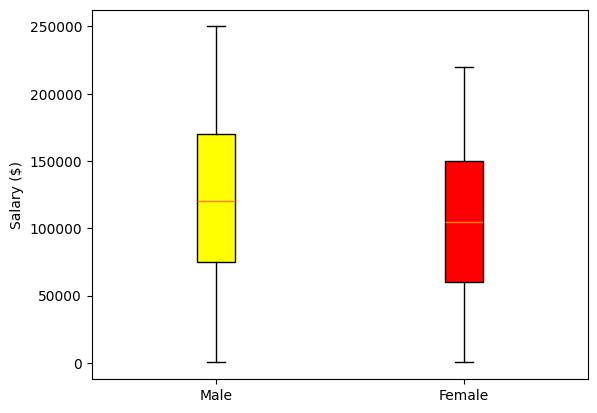

In [147]:
gender_salary_groups = cleaned_df.groupby('Gender')

male = gender_salary_groups.Salary.get_group(name="Male")
female = gender_salary_groups.Salary.get_group(name="Female")

display(male.mean())
display(male.min())
display(female.mean())
display(female.min())

gender_salary_ttest = sp.stats.ttest_ind(male, female)

display(gender_salary_ttest)

labels = ['Male', 'Female']
colors = ['yellow', 'red']

fig, ax = plt.subplots()
ax.set_ylabel('Salary ($)')

bplot = ax.boxplot([male, female],
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

According to the p-value of the Two Sample T-Test we can determine that the means of the salaries of the different genders are significantly different than each other. This means we can reject the null hypothesis and accept the alternate hypothesis that gender does have an effect on salary

**What is the correlation between age and salary?**

np.float64(0.7280606296367431)

np.float64(5046.646365258156)

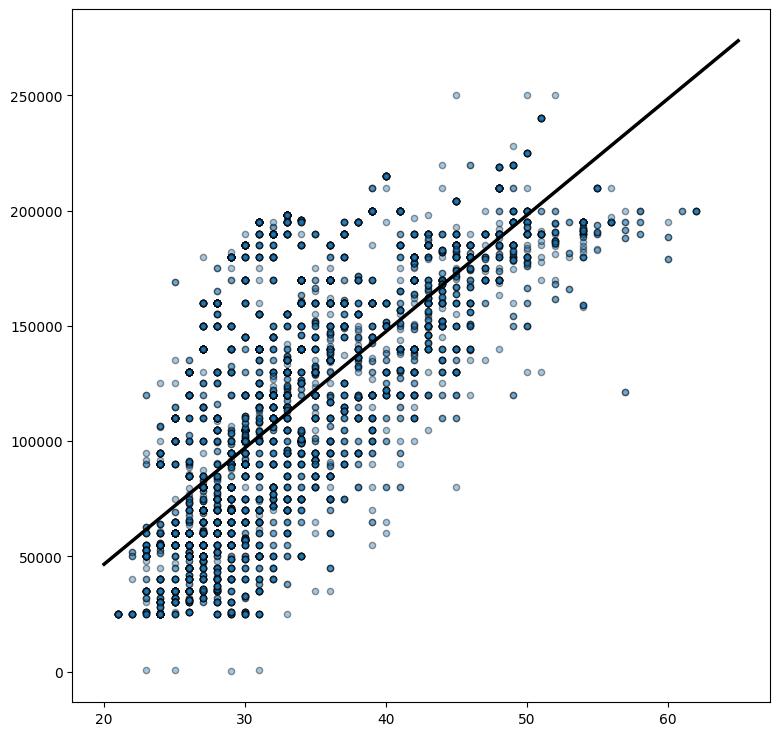

In [ ]:
age_salary_correlation = cleaned_df['Age'].corr(cleaned_df['Salary'])
display(age_salary_correlation)

fig, ax = plt.subplots(figsize=(9, 9))

ax.scatter(cleaned_df['Age'], cleaned_df['Salary'], s=20, alpha=0.4, edgecolors="k")

b, a = np.polyfit(cleaned_df['Age'], cleaned_df['Salary'], deg=1)

xseq = np.linspace(20, 65, num=100)

ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

According to the r value that we get from performing the correlation function on age and salary we can see that Age has a strong positive correlation with salary.